(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'One vs One Comparison: KNN vs RandomForest'}, xlabel='KNN performance', ylabel='RandomForest performance'>)

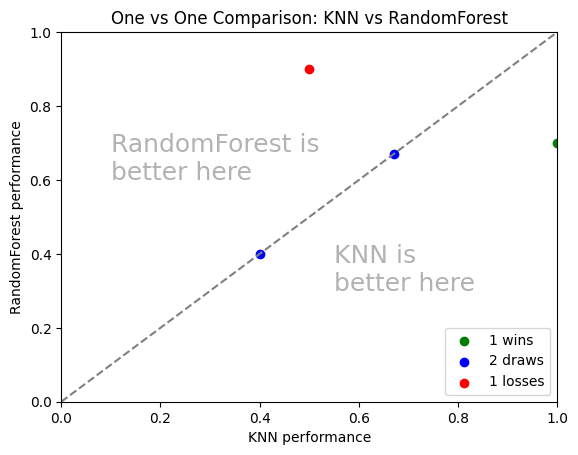

In [2]:
from labicompare.visualization import one_vs_one_plot
import numpy as np

one_vs_one_plot(np.array([1, 0.5, 0.4, 0.67]), np.array([0.7, 0.9, 0.4, 0.67]), 'KNN', 'RandomForest')